In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("FIFA19.csv")

In [3]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,16,Luis García,37,https://cdn.sofifa.org/players/4/19/16.png,Spain,https://cdn.sofifa.org/flags/45.png,71,71,KAS Eupen,https://cdn.sofifa.org/teams/2/light/2013.png,...,79.0,70.0,43.0,40.0,9.0,12.0,13.0,11.0,11.0,€1.1M
1,41,Iniesta,34,https://cdn.sofifa.org/players/4/19/41.png,Spain,https://cdn.sofifa.org/flags/45.png,86,86,Vissel Kobe,https://cdn.sofifa.org/teams/2/light/101146.png,...,89.0,67.0,57.0,56.0,6.0,13.0,6.0,13.0,7.0,€26.9M
2,80,E. Belözoğlu,37,https://cdn.sofifa.org/players/4/19/80.png,Turkey,https://cdn.sofifa.org/flags/48.png,79,79,Medipol Başakşehir FK,https://cdn.sofifa.org/teams/2/light/101014.png,...,80.0,65.0,67.0,60.0,7.0,11.0,7.0,14.0,8.0,€7.6M
3,164,G. Pinzi,37,https://cdn.sofifa.org/players/4/19/164.png,Italy,https://cdn.sofifa.org/flags/27.png,70,70,Padova,https://cdn.sofifa.org/teams/2/light/110912.png,...,68.0,74.0,71.0,66.0,5.0,15.0,7.0,6.0,13.0,€372K
4,657,D. Vaughan,35,https://cdn.sofifa.org/players/4/19/657.png,Wales,https://cdn.sofifa.org/flags/50.png,66,66,Notts County,https://cdn.sofifa.org/teams/2/light/1937.png,...,82.0,59.0,66.0,62.0,6.0,9.0,10.0,9.0,7.0,€263K


The overall column represents the quality of a player in their natural position on a scale from 1 to 100. This value if a sorted weighted average of the many individual stats each player has. 

The importance of attributes varies for different positions on the field. This means that for different positions, one needs different abilities. For example, acceleration and top speed are more important for a winger than tackling. However, the inverse is true for center backs. Thus, the weights have been altered for each stat based on the position of the player. Therefore, there is not a single formula which calculates the overall evaluation. 

In [5]:
df.shape

(18207, 88)

So we have 88 columns and 18207 rows.

In [7]:

df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [8]:
column_list = df.columns.tolist()
print(column_list)

['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']


In [9]:
#Let's write these column names in a proper dataframe to get a good understanding.
columns_df = pd.DataFrame(df.columns, columns = ['Column Names'])
columns_df.head(30)

,Column Names
0,ID
1,Name
2,Age
3,Photo
4,Nationality
5,Flag
6,Overall
7,Potential
8,Club
9,Club Logo


## Data Cleaning

Let's check our data for null values or any errors and then clean it according to our requirement.

In [12]:
df.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [13]:
df.isnull()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18204,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18205,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
df.isnull().sum()

ID                   0
Name                 0
Age                  0
Photo                0
Nationality          0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 88, dtype: int64

In [15]:
df.duplicated().sum()

0

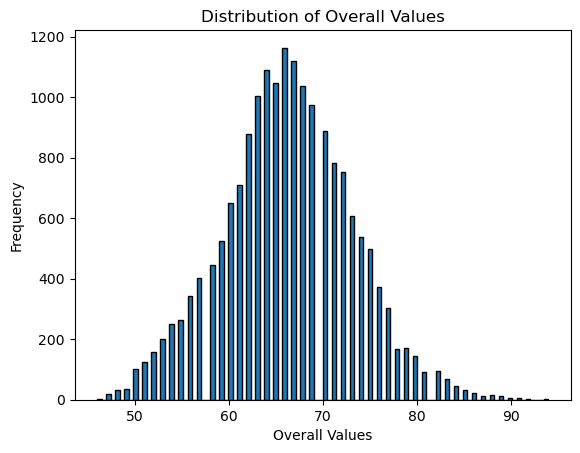

In [16]:
#Let's construct a histogram, to get an idea of how well-distributed the overall values are. 
plt.hist(df["Overall"], bins = 100, edgecolor = "Black")
plt.xlabel("Overall Values")
plt.ylabel("Frequency")
plt.title("Distribution of Overall Values")
plt.show()

The graph is bell-shaped and resembles a normal distribution. However, it seems that how come the discrete values show a normal distribution. Here, continuous variables can take discrete values but not vice versa. Since we are dealing with rounded averages, we are inclined to believe that the column overall is not entirely discrete but rather an approximation. 

We can note the thin tails of the graph suggests a smaller number of outliers. This reflects real life quite accurately since very few professional players are exceptionally good or bad at every single aspect of the sport. Besides, even the least skilled professional soccer players are far superior to the average person. That explains why the lowest overall values start from around 50 rather than zero.

One more thing to note here is that the overall values are symmetrical which is also a characteristic of normal distribution. 
Also, note that the single team or division shares similar stats. This will skew the data in a ceratin way and therefore we cannot expect the values to follow a normal distribution. 

In [32]:
# Let's further test the balance by creating a histogram of a small sample of random players.
# Let's test for first 30 players.
Overall_sample = df["Overall"].head(30)
print(Overall_sample)

0     71
1     86
2     79
3     70
4     66
5     75
6     88
7     73
8     63
9     57
10    75
11    69
12    71
13    82
14    72
15    73
16    70
17    84
18    69
19    67
20    59
21    62
22    67
23    53
24    57
25    63
26    68
27    61
28    76
29    71
Name: Overall, dtype: int64


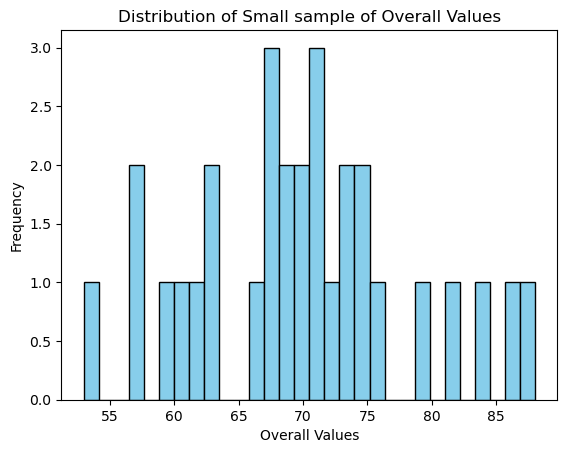

In [38]:
plt.hist(Overall_sample, bins = 30, edgecolor = "Black", color = "skyblue")
plt.xlabel("Overall Values")
plt.ylabel("Frequency")
plt.title("Distribution of Small sample of Overall Values")
plt.show()

We can see that there are many bins of only 1 or 2 frequency and this makes our histogram redundant. If we adjust the bin size then maybe we can see the graph resembling a normal distribution. 

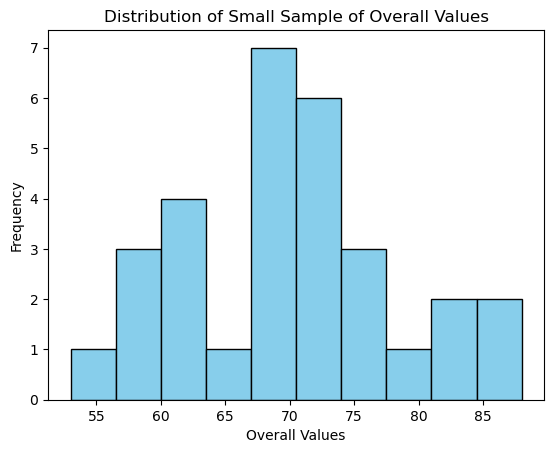

In [53]:
plt.hist(Overall_sample, bins = 10, edgecolor = "Black", color = "skyblue")
plt.xlabel("Overall Values")
plt.ylabel("Frequency")
plt.title("Distribution of Small Sample of Overall Values")
plt.show()

We can see that the graph is slightly resembling the normal distribution when we reduce the bin size. However, we can also notice the fatter tails. Since the no. of observations is limited, we can safely consider that this sample follows a Student's t-distribution. Student's t-distribution is also symmetric.

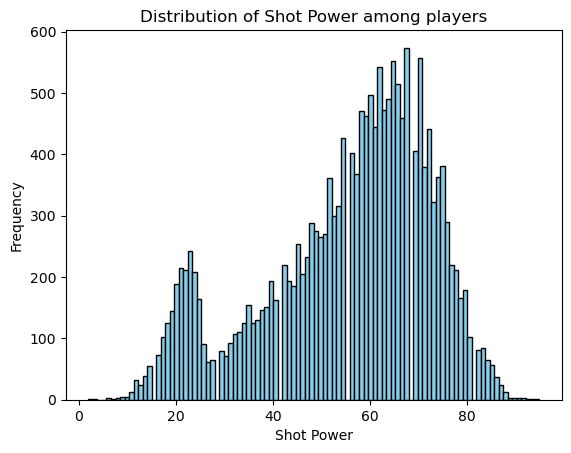

In [56]:
# Now, let's explore how a single stat is distributed among the players in the game. Take the shot power column, for example, and create a histogram.
plt.hist(df["ShotPower"], bins = 100, edgecolor = "Black", color = "skyblue")
plt.xlabel("Shot Power")
plt.ylabel("Frequency")
plt.title("Distribution of Shot Power among players")
plt.show()

We can see the distribution with two peaks. We can interpret this by considering two distinct groups of players, one with a mean of around 21 and the other with a mean of around 65 or 70. The reason behind this could be the presence of goalkeepers in the game. The stats important for them are completely different from the stats essential for outfield players. Thus it makes sense that they will have distinctly lower values for many of the non-goalkeeper specific stats. 

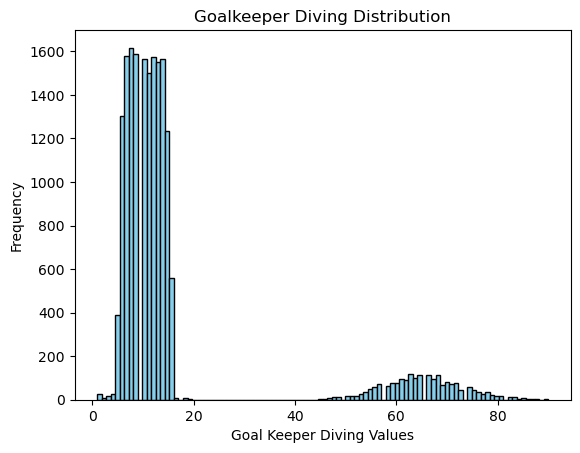

In [73]:
# If we examine a goalkeeping trait like GK diving, we will be able to see the division into types more clearly.
plt.hist(df["GKDiving"], bins = 100, edgecolor = "Black", color = "skyblue")
plt.xlabel("Goal Keeper Diving Values")
plt.ylabel("Frequency")
plt.title("Goalkeeper Diving Distribution")
plt.show()

We can see that there are two completely different clusters. The low value represents how outfield players would perform in goal. And the higher one represents the actual goalkeeper's performance. If we only examine the goalies, we will see the values are normally distributed once again. 


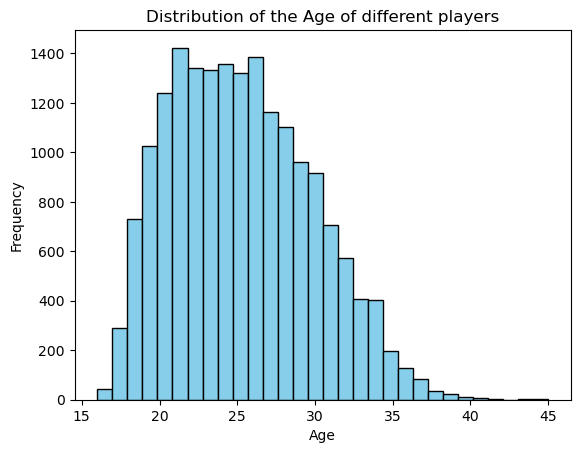

In [92]:
# Now, one more thing to note in this dataset is that the young professional soccer players outnumber the veterans. 
# So, let's create a histogram to see the distribution of the Age column.
plt.hist(df["Age"], bins = 30, color = "skyblue", edgecolor = "Black")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of the Age of different players")
plt.show()

So, age is a discreet variable representing the age of each player. In addition, age has a minimum value of 16 since the game only consists of first-team players who have signed a professional contract. Thus, we can consider 16 as the starting point for any player who can sign a professional contract. We can see it as sort of an origin for a Poisson distribution. Then, each bar in the graph would showcase the likelihood of a certain player within the data to be a specific age. Since a Poisson distribution is skewed, the younger players outnumber the older ones. 